In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn.preprocessing import normalize
import scipy.spatial.distance as ssd
from scipy.optimize import linear_sum_assignment
import pandas as pd
import munkres
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')
data = "/content/drive/My Drive/Colab Notebooks/face.mat"

In [0]:
faces = sio.loadmat(data)
X, y = [], []
for i in range(53):
  face_i = faces['X'][:, 10*i:10*(i+1)]
  label_i = faces['l'][:, 10*i:10*(i+1)]
  X.append(face_i.T)
  y.append(label_i.T)
X = np.concatenate(X)
X = np.array(X)
y = np.concatenate(y)
y = np.concatenate(y)

In [0]:
X_train, X_test, y_train, y_test = [], [], [], []
# train
for i in range(32):
    face_i = faces['X'][:, 10*i:10*(i+1)]
    label_i = faces['l'][:, 10*i:10*(i+1)]
  
    X_train.append(face_i.T)
    y_train.append(label_i.T)
#  test
for i in range(32, 53):
    face_i = faces['X'][:, 10*i:10*(i+1)]
    label_i = faces['l'][:, 10*i:10*(i+1)]
    X_test.append(face_i.T)
    y_test.append(label_i.T) 

In [0]:
X_train = np.concatenate(X_train)
X_test = np.concatenate(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
X_train_N = normalize(X_train, axis=1, norm='l2')
X_test_N = normalize(X_test, axis=1, norm='l2')

# K-means







In [0]:
# Number of clusters
kmeans = KMeans(n_clusters=50, init='k-means++', n_init=100, max_iter=100000,
                 tol=0.0001, precompute_distances=True, verbose=0,
                 random_state=None, copy_x=True, n_jobs=1)
# Fitting the input data
kmeans = kmeans.fit(X_train_N)
# Getting the cluster labels
k_labels = kmeans.predict(X_train_N)
# Centroid values
centroids = kmeans.cluster_centers_

In [0]:
"""
cost matrix represents the average euclidean distances of each centroid to each label
cost_matrix[i][j] is the average distance of centroid [i] with images of label [j]
"""

cost_matrix = []
for i in range(32):
  label_cost = []
  distance = 0
  for centroid in centroids:
    d = []
    for j in range(10):
      d.append(ssd.euclidean(X_train_N[10*i+j], centroid))
    label_cost.append(np.average(d))
  cost_matrix.append(label_cost)
cost_matrix = np.array(cost_matrix)
cost_matrix = cost_matrix.T

In [0]:
# perform Hungarian algorithm on the cost_matrix
opt_centroids, opt_labels = linear_sum_assignment(cost_matrix)
cost_matrix[opt_centroids, opt_labels].sum()

In [0]:
centroids_label = dict()
for c, l in zip(opt_centroids, opt_labels):
  centroids_label[c] = l

print(centroids_label)

{1: 8, 3: 4, 5: 17, 6: 1, 7: 31, 8: 9, 9: 19, 10: 11, 11: 13, 12: 29, 13: 16, 14: 0, 15: 14, 17: 18, 18: 10, 21: 23, 23: 6, 24: 15, 25: 26, 26: 27, 27: 7, 28: 2, 29: 24, 30: 30, 33: 28, 35: 12, 37: 20, 38: 21, 42: 25, 45: 3, 47: 5, 48: 22}


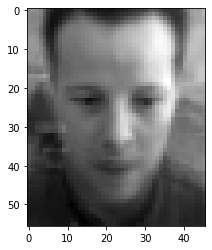

In [0]:
x = np.reshape(np.average(X_train[310:320], axis=0), (46, 56))
plt.imshow(x.T, cmap='gist_gray')

#  Agglomerative Clustering

In [0]:
agg = AgglomerativeClustering(n_clusters=32, affinity='euclidean', linkage="ward")
# agg = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage="ward", 
#                               compute_full_tree=True, distance_threshold=0.9)

agg_labels = agg.fit_predict(X_train_N)
print(agg.labels_)

[14 24 14 14 14 14  1 24  1  1 10 10 10 10 22  9  2 31  2  2  3  0  6  6
  6  6  3  3  3  3  3  0  3  3  3  3 27 27 27 27 10 22 22 22 22 22 10 10
 10 10  8  8 17 17 20  7 29  8  8  8 20 24 20 14 20 15 20 20 20 20 10 10
 10 22 22 22 10 10 10 10 13 13 13 13 13 13 18 18 18 18 24 24 13 14 14 14
  1  1  1  1 24  1 15 15 15  9 29 29 29 29 13 13 13 13 13 13 18 18 18 18
 19 19 19 19 19 19 31 31 18 31 10  0  9  9 13 13 30 30 30 30  2  2 28 17
 28 28  2  2  2  2 10 10  9  9  9 11 31  1 31 31  8 12  7  7 15  7 29 29
  1  1 19 31  9  9  9 26 31  1 31 26  8  8  5  5 20  0  5  8  0  5 31 31
 31  6  6 17 26 30 30 26  5  5 17 17 17 11  5  5  5  5  0  0 13 28 15 28
  0  0  0  1 16 16  6  6  6  6 16 16 16 16  8 24  3  3  3 20  1 23 23 23
 12 12 11 11 11 10 30 30  1 30 12 12 15 15 15 15 25 25 25 25 12 12 11  4
 11 11  4  4  4  4 12  1 21 21 21 21 21 21 21 21 12 12 11 11 11  7  7  7
  7  7 12 12 15  7  7  7  7 29  7  7 12 12  4  4 21  4  4  4  4  4 19 19
  9  9  9  9  2  2  2  2]


In [0]:
from collections import defaultdict

def distance(u, X):
  distance, l = float('inf'), float('inf')
  for label, c in X:
    d = ssd.euclidean(u, c)
    if d < distance:
      distance = d
      l = label
  return l

def calculate_new_centroids(X_train_N, agg_labels):
  agglomerative = defaultdict(list)
  for img, label in zip(X_train_N, agg_labels):
    agglomerative[label].append(img)
  centroids = []
  for label, images in agglomerative.items():
    centroid = np.average(images, axis=0)
    centroids.append((label, centroid))
  return centroids


def calculate_new_labels(X_train_N, centroids):
  new_labels = []
  for xn in X_train_N:
    label = distance(xn, centroids)
    new_labels.append(label)
  return new_labels

def clustering(X_train_N, agg_labels):
  new_labels = []
  old_labels = [i+1 for i in agg_labels]
  cont = True
  
  while cont:
    centroids = calculate_new_centroids(X_train_N, old_labels)
    new_labels = calculate_new_labels(X_train_N, centroids)
    if old_labels != new_labels:
      old_labels = new_labels
    else:
      cont = False
  
  return new_labels, centroids

y_agg, centroids = clustering(X_train_N, agg_labels)

In [0]:
c = []
for l, centroid in centroids:
  c.append(centroid)
centroids = c

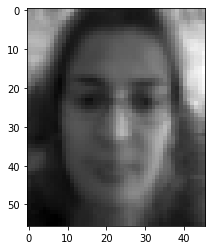

In [0]:
x = np.reshape(centroids[10], (46, 56))
plt.imshow(x.T, cmap='gist_gray')

# Fisher vectors

#### Cluster distances

In [0]:
# Distances
from math import sqrt 
from sklearn.metrics.pairwise import chi2_kernel

def manhattan_(u, X):
  manhattan = []
  for img in X:
    manhattan.append(ssd.cityblock(u, img))
  return manhattan

def euclidean_(u, X):
  euclidean = []
  for  img in X:
    euclidean.append(ssd.euclidean(u, img))
  return euclidean

def chebyshev_(u, X):
  chebyshev = []
  for  img in X:
    chebyshev.append(ssd.chebyshev(u, img))
  return chebyshev

def cosine_(u, X):
  cosine = []
  for  img in X:
    cosine.append(ssd.cosine(u, img))
  return cosine

def correlation_(u, X):
  correlation = []
  for  img in X:
    correlation.append(ssd.correlation(u, img))
  return correlation  

In [0]:
def calculateFRank(matrix, y):
  rank1, rank10 = 0, 0
  for img, label in zip(matrix, y):
    for i in range(1, 11):
      _, predicted = img[i]
      if predicted == label[0]:
        rank1 = rank1 + 1 if i == 1 else rank1
        rank10 += 1
        break
  rank1_pc = rank1/200*100
  rank10_pc = rank10/200*100
  return rank1_pc, rank10_pc

In [0]:
manhattan_feature = []
euclidean_feature = []
chebyshev_feature = []
cosine_feature = []
correlation_feature = []

for xn in X_test_N:
  manhattan_feature.append(manhattan_(xn, centroids))
  euclidean_feature.append(euclidean_(xn, centroids))
  chebyshev_feature.append(chebyshev_(xn, centroids))
  cosine_feature.append(cosine_(xn, centroids))
  correlation_feature.append(correlation_(xn, centroids))

In [0]:
def features(manhattan_feature, euclidean_feature, chebyshev_feature, cosine_feature, correlation_feature):

  manhattan_feature_distance = []
  euclidean_feature_distance = []
  chebyshev_feature_distance = []
  cosine_feature_distance = []
  correlation_feature_distance = []
  for man, euc, chb, cos, cor in zip(manhattan_feature, 
                                      euclidean_feature, 
                                      chebyshev_feature, 
                                      cosine_feature,
                                      correlation_feature):
      manhattan_feature_distance.append(manhattan(man, manhattan_feature, y=y_test))
      euclidean_feature_distance.append(euclidean(euc, euclidean_feature, y=y_test))
      chebyshev_feature_distance.append(chebyshev(chb, chebyshev_feature, y=y_test))
      cosine_feature_distance.append(cosine(cos, cosine_feature, y=y_test))
      correlation_feature_distance.append(correlation(cor, correlation_feature, y=y_test))



  ordered_manhattan_feature = []
  ordered_euclidean_feature = []
  ordered_chebyshev_feature = []
  ordered_cosine_feature = []
  ordered_correlation_feature = []
  for man, euc, chb, cos, cor in zip(manhattan_feature_distance, 
                                      euclidean_feature_distance, 
                                      chebyshev_feature_distance, 
                                      cosine_feature_distance,
                                      correlation_feature_distance):
    ordered_manhattan_feature.append(sorted(man))
    ordered_euclidean_feature.append(sorted(euc))
    ordered_chebyshev_feature.append(sorted(chb))
    ordered_cosine_feature.append(sorted(cos))
    ordered_correlation_feature.append(sorted(cor))

  return ordered_manhattan_feature, ordered_euclidean_feature, ordered_chebyshev_feature, ordered_cosine_feature, ordered_correlation_feature



In [0]:
ordered_manhattan_feature, ordered_euclidean_feature, ordered_chebyshev_feature, ordered_cosine_feature, ordered_correlation_feature = features(manhattan_feature, 
                                                                                                                                                euclidean_feature, 
                                                                                                                                                chebyshev_feature, 
                                                                                                                                                cosine_feature, 
                                                                                                                                                correlation_feature)


manhattan_f_rank1, manhattan_f_rank10 = calculateFRank(ordered_manhattan_feature, y_test)
euclidean_f_rank1, euclidean_f_rank10 = calculateFRank(ordered_euclidean_feature, y_test)
chebyshev_f_rank1, chebyshev_f_rank10 = calculateFRank(ordered_chebyshev_feature, y_test)
cosine_f_rank1, cosine_f_rank10 = calculateFRank(ordered_cosine_feature, y_test)
correlation_f_rank1, correlation_f_rank10 = calculateFRank(ordered_correlation_feature, y_test)

In [0]:
print(manhattan_f_rank1, manhattan_f_rank10)
print(euclidean_f_rank1, euclidean_f_rank10)
print(chebyshev_f_rank1, chebyshev_f_rank10)
print(cosine_f_rank1, cosine_f_rank10)
print(correlation_f_rank1, correlation_f_rank10)

In [0]:
manhattan_f_map = numericalMAP(calculateMAP(ordered_manhattan_feature, y_test))
euclidean_f_map = numericalMAP(calculateMAP(ordered_euclidean_feature, y_test))
chebyshev_f_map = numericalMAP(calculateMAP(ordered_chebyshev_feature, y_test))
cosine_f_map = numericalMAP(calculateMAP(ordered_cosine_feature, y_test))
correlation_f_map = numericalMAP(calculateMAP(ordered_correlation_feature, y_test))

In [0]:
print(manhattan_f_map)
print(euclidean_f_map)
print(chebyshev_f_map)
print(cosine_f_map)
print(correlation_f_map)

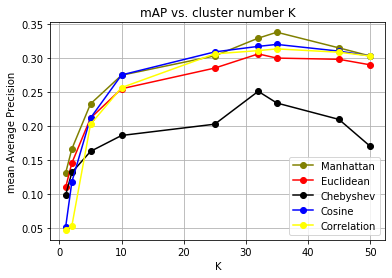

In [0]:
K = [1, 2, 5, 10, 25, 32, 35, 45, 50]

man = [0.1311, 0.1664, 0.2326, 0.2747, 0.3032, 0.3292, 0.3379, 0.3149, 0.3030]
euc = [0.1100, 0.1457, 0.2116, 0.2548, 0.2852, 0.3060, 0.2999, 0.2981, 0.2900]
chb = [0.0987, 0.1317, 0.1627, 0.1861, 0.2027, 0.2510, 0.2338, 0.2097, 0.1704]
cos = [0.0516, 0.1180, 0.2118, 0.2751, 0.3090, 0.3171, 0.3200, 0.3101, 0.3030]
cor = [0.0472, 0.0534, 0.2025, 0.2565, 0.3061, 0.3109, 0.3134, 0.3085, 0.3030]

leyenda = ['Manhattan', 'Euclidean', 'Chebyshev', 'Cosine', 'Correlation']
plt.plot(K, man, marker='o', color='olive')
plt.plot(K, euc, marker='o', color='red')
plt.plot(K, chb, marker='o', color='black')
plt.plot(K, cos, marker='o', color='blue')
plt.plot(K, cor, marker='o', color='yellow')
plt.xlabel('K')
plt.ylabel('mean Average Precision')
plt.title('mAP vs. cluster number K')
plt.legend(leyenda)
plt.grid()
plt.show()



#### Fishing

In [0]:
def calcInverseCovariance(cluster):
  return 1/(np.diag(np.cov(np.array(cluster).T)) + 1e-6)


def getInverseCovarianceMatrix(train_data, labels, title=""):
  inverse_covariance_matrix = normalize(list(map(lambda x: calcInverseCovariance(list(map(lambda y: y[0], filter(lambda z: z[1] == x, zip(train_data, labels))))).ravel(), np.arange(np.max(labels) + 1))), axis=1)
  print(title + " inverse covariance matrix shape: " + str(np.shape(inverse_covariance_matrix)))
  return inverse_covariance_matrix


def getGMMGamma(test_data, labels, cluster_centers, inverse_covariance_matrix, title=""):
  weights = list(map(lambda x: np.sum(labels == x)/np.size(labels), np.arange(np.max(labels) + 1)))
  gmm = GaussianMixture(n_components=np.max(labels) + 1, weights_init=weights, means_init=cluster_centers, precisions_init=inverse_covariance_matrix, covariance_type="diag")
  gmm.fit(test_data)
  gamma = gmm.predict_proba(test_data)
  print(title + " gamma vectors shape: " + str(np.shape(gamma)))
  return gamma, weights
  

def calcFisherStatistics(data, weight, gamma, cluster_center, covariance):
  v = (1/math.sqrt(weight))*gamma*(data - cluster_center)/covariance
  u = (1/math.sqrt(2*weight))*gamma*(-1 + (data - cluster_center)/covariance)**2
  return np.concatenate([v, u], axis=0)


def getFisherVectors(test_data, cluster_centers, weights, inverse_covariance_matrix, gamma, title=""):
  fisher_vectors = normalize(list(map(lambda x: np.array(list(map(lambda y: calcFisherStatistics(x[0], y[2], y[3][x[1]], y[0], y[1]), zip(cluster_centers, inverse_covariance_matrix, weights, gamma.T)))).ravel(), zip(test_data, np.arange(np.size(test_data))))), axis=1)
  print(title + " fisher vectors shape: " + str(np.shape(fisher_vectors)))
  return fisher_vectors

In [0]:
inverse_covariance_matrix = getInverseCovarianceMatrix(X_train_N, agg_labels, "Agglomerative")
gamma, weights = getGMMGamma(X_test_N, agg_labels, centroids, inverse_covariance_matrix, "Agglomerative")
fisher_vectors = getFisherVectors(X_test_N, centroids, weights, inverse_covariance_matrix, gamma, "Agglomerative")

Agglomerative inverse covariance matrix shape: (32, 2576)
Agglomerative gamma vectors shape: (200, 32)
Agglomerative fisher vectors shape: (200, 164864)


In [0]:
manhattan_feature_fish = []
euclidean_feature_fish = []
chebyshev_feature_fish = []
cosine_feature_fish = []
correlation_feature_fish = []

for xn in fisher_vectors:
  manhattan_feature_fish.append(manhattan_(xn, fisher_vectors))
  euclidean_feature_fish.append(euclidean_(xn, fisher_vectors))
  chebyshev_feature_fish.append(chebyshev_(xn, fisher_vectors))
  cosine_feature_fish.append(cosine_(xn, fisher_vectors))
  correlation_feature_fish.append(correlation_(xn, fisher_vectors))

In [0]:
ordered_manhattan_feature_fish, ordered_euclidean_feature_fish, ordered_chebyshev_feature_fish, ordered_cosine_feature_fish, ordered_correlation_feature_fish = features(manhattan_feature_fish, 
                                                                                                                                                                          euclidean_feature_fish, 
                                                                                                                                                                          chebyshev_feature_fish, 
                                                                                                                                                                          cosine_feature_fish, 
                                                                                                                                                                          correlation_feature_fish)


manhattan_f_rank1, manhattan_f_rank10 = calculateFRank(ordered_manhattan_feature_fish, y_test)
euclidean_f_rank1, euclidean_f_rank10 = calculateFRank(ordered_euclidean_feature_fish, y_test)
chebyshev_f_rank1, chebyshev_f_rank10 = calculateFRank(ordered_chebyshev_feature_fish, y_test)
cosine_f_rank1, cosine_f_rank10 = calculateFRank(ordered_cosine_feature_fish, y_test)
correlation_f_rank1, correlation_f_rank10 = calculateFRank(ordered_correlation_feature_fish, y_test)

In [0]:
print(manhattan_f_rank1, manhattan_f_rank10)
print(euclidean_f_rank1, euclidean_f_rank10)
print(chebyshev_f_rank1, chebyshev_f_rank10)
print(cosine_f_rank1, cosine_f_rank10)
print(correlation_f_rank1, correlation_f_rank10)

In [0]:
manhattan_f_map = numericalMAP(calculateMAP(ordered_manhattan_feature_fish, y_test))
euclidean_f_map = numericalMAP(calculateMAP(ordered_euclidean_feature_fish, y_test))
chebyshev_f_map = numericalMAP(calculateMAP(ordered_chebyshev_feature_fish, y_test))
cosine_f_map = numericalMAP(calculateMAP(ordered_cosine_feature_fish, y_test))
correlation_f_map = numericalMAP(calculateMAP(ordered_correlation_feature_fish, y_test))

In [0]:
print(manhattan_f_map)
print(euclidean_f_map)
print(chebyshev_f_map)
print(cosine_f_map)
print(correlation_f_map)

# Distances

In [0]:
# Distances
from math import sqrt 

def manhattan(u, X, y):
  manhattan = []
  for img, label in zip(X, y):
    manhattan.append((ssd.cityblock(u, img), label))
  return manhattan

def euclidean(u, X, y):
  euclidean = []
  for img, label in zip(X, y):
    euclidean.append((ssd.euclidean(u, img), label))
  return euclidean

def chebyshev(u, X, y):
  chebyshev = []
  for img, label in zip(X, y):
    chebyshev.append((ssd.chebyshev(u, img), label))
  return chebyshev

def chiSq(u, X, y):
  chi = []
  for img, label in zip(X, y):
    chi.append((0.5*np.sum((img-u)**2/(img+u+1e-6)), label))
  return chi

def cosine(u, X, y):
  cosine = []
  for img, label in zip(X, y):
    cosine.append((ssd.cosine(u, img), label))
  return cosine

def correlation(u, X, y):
  correlation = []
  for img, label in zip(X, y):
    correlation.append((ssd.correlation(u, img), label))
  return correlation  

In [0]:
# ranks and mAP
from collections import defaultdict

def calculateRank(matrix, y):
  rank1, rank10 = 0, 0
  for img, label in zip(matrix, y):
    _, predicted = img[0]
    if (predicted+1) == y[0]:
      rank1 += 1
  rank1_pc = rank1/32*100
  return rank1_pc

def calculateMAP(matrix, y):
  mAP = []
  for img, label in zip(matrix, y):
    rank = defaultdict(list)
    total_correct = 0
    for i in range(11):
      _, predicted = img[i]
      total_correct = total_correct + 1 if predicted == label[0] else total_correct
      precision = total_correct/(i+1)
      rank[i+1].append(precision)
    new_correct = 0
    for i in range(11):
      _, predicted = img[i]
      new_correct = new_correct + 1 if predicted == label[0] else new_correct
      recall = new_correct/total_correct if total_correct != 0 else 0
      rank[i+1].append(recall)
    mAP.append(rank)
  return mAP

def numericalMAP(matrix):
  AP = 0
  for d in matrix:
    vals = np.array(list(d.values()))
    AP += np.trapz(vals.T[0], vals.T[1])
  return AP/len(matrix)

In [0]:
manhattan_matrix, manhattan_matrix_N = [], []
euclidean_matrix, euclidean_matrix_N = [], []
chebyshev_matrix, chebyshev_matrix_N = [], []
chi_sq_matrix, chi_sq_matrix_N = [], []
cosine_matrix, cosine_matrix_N = [], []
correlation_matrix, correlation_matrix_N = [], []

for xn in X_train_N:
  # manhattan distance
  manhattan_matrix_N.append(manhattan(xn, centroids, y=opt_labels))
  # euclidean distance
  euclidean_matrix_N.append(euclidean(xn, centroids, y=opt_labels))
  # chebyshev distance
  chebyshev_matrix_N.append(chebyshev(xn, centroids, y=opt_labels))
  # chi-square distance
  chi_sq_matrix_N.append(chiSq(xn, centroids, y=opt_labels))
  # cosine distance 
  cosine_matrix_N.append(cosine(xn, centroids, y=opt_labels))
  # correlation distance
  correlation_matrix_N.append(correlation(xn, centroids, y=opt_labels))

In [0]:
ordered_manhattan, ordered_manhattan_N = [], []
ordered_euclidean, ordered_euclidean_N = [], []
ordered_chebyshev, ordered_chebyshev_N = [], []
ordered_chi, ordered_chi_N = [], []
ordered_cosine, ordered_cosine_N = [], []
ordered_correlation, ordered_correlation_N = [], []

# normalised
for man, euc, chb, chi, cos, cor in zip(manhattan_matrix_N, euclidean_matrix_N, chebyshev_matrix_N, chi_sq_matrix_N, cosine_matrix_N, correlation_matrix_N):
  ordered_manhattan_N.append(sorted(man))
  ordered_euclidean_N.append(sorted(euc))
  ordered_chebyshev_N.append(sorted(chb))
  ordered_chi_N.append(sorted(chi))
  ordered_cosine_N.append(sorted(cos))
  ordered_correlation_N.append(sorted(cor))

In [0]:
# manhattan_rank1, manhattan_rank10 = calculateRank(ordered_manhattan)
manhattan_n_rank1 = calculateRank(ordered_manhattan_N, y_train)

# euclidean_rank1, euclidean_rank10 = calculateRank(ordered_euclidean)
euclidean_n_rank1 = calculateRank(ordered_euclidean_N, y_train)

# chebyshev_rank1, chebyshev_rank10 = calculateRank(ordered_chebyshev)
chebyshev_n_rank1 = calculateRank(ordered_chebyshev_N, y_train)

# chi_rank1, chi_rank10 = calculateRank(ordered_chi)
chi_n_rank1 = calculateRank(ordered_chi_N, y_train)

# cosine_rank1, cosine_rank10 = calculateRank(ordered_cosine)
cosine_n_rank1 = calculateRank(ordered_cosine_N, y_train)

# correlation_rank1, correlation_rank10 = calculateRank(ordered_correlation)
correlation_n_rank1 = calculateRank(ordered_correlation_N, y_train)

In [0]:
print("Manhattan normalised: rank1 = {:.2f}".format(manhattan_n_rank1))
print('')
print("Euclidean normalised: rank1 = {:.2f}".format(euclidean_n_rank1))
print('')
print("Chebyshev normalised: rank1 = {:.2f}".format(chebyshev_n_rank1))
print('')
print("Chi squared normalised: rank1 = {:.2f}".format(chi_n_rank1))
print('')
print("Cosine normalised: rank1 = {:.2f}".format(cosine_n_rank1))
print('')
print("Correlation normalised: rank1 = {:.2f}".format(correlation_n_rank1))